# Handwritten Digit Recognition
This tutorial guides you through a classic computer vision application: identify hand written digits with neural networks.

In [1]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a GPU.
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.callbacks import TensorBoard


Using TensorFlow backend.


Setting up some hyper-parameters (try others yourself)

In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

## Load data
We first fetch the MNIST dataset, which is a commonly used dataset for handwritten digit recognition. Each image in this dataset has been resized into 28x28 with grayscale value between 0 and 254. The following codes download and load the images and the according labels into numpy.

In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


### Installing additional modules ###
If you don't have Jupyther Themes installed, the following cell will fail. This is a good opportunity to learn how to add modules to your jupyter environment or to skip this cell for now (it is adding only small visual modifications).
If you decided to install the module open a terminal from the home page of jupyther (where you opened this notebook from) using the "new" button.

Run *pip install jupyterthemes*

If the next cell is still failing you are probably using conda to switch between different environments.

Run *source activate tensorflow_p27* (or any other environment you are using - see on the top right of your notebook)
and then *pip install jupyterthemes* again.

In [5]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

We plot the first 9 images and their classes

/home/ec2-user/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


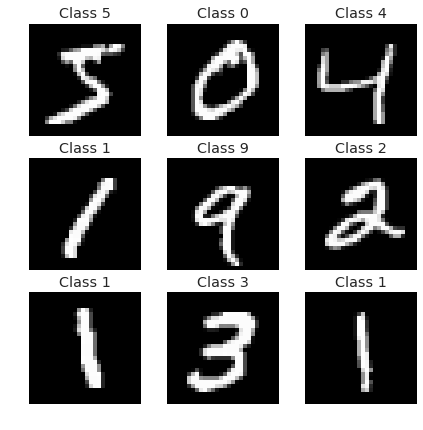

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.axis('off')
    
plt.show()

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Build the neural network

Build the neural-network. Here we'll do a simple 3 layer fully connected network.
![GitHub Logo](https://github.com/wxs/keras-mnist-tutorial/blob/master/figure.png?raw=true)


In [9]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


Connect to TensorBoard

In [11]:
tensorbaord = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)
callbacks_list = [tensorbaord]

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [13]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    verbose=1, callbacks=callbacks_list,
                    validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0182 - acc: 0.9955 - val_loss: 0.1059 - val_acc: 0.9852
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0150 - acc: 0.9960 - val_loss: 0.1158 - val_acc: 0.9833
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0169 - acc: 0.9957 - val_loss: 0.1029 - val_acc: 0.9842
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0142 - acc: 0.9964 - val_loss: 0.1216 - val_acc: 0.9841
Epoch 5/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0157 - acc: 0.9965 - val_loss: 0.1193 - val_acc: 0.9835
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0157 - acc: 0.9962 - val_loss: 0.1088 - val_acc: 0.9846
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0180 - acc: 0.9963 - val_loss: 0.1235 - val_acc

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
assert score[1] > 0.98

Test score: 0.125259650178
Test accuracy: 0.9842


## Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [15]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

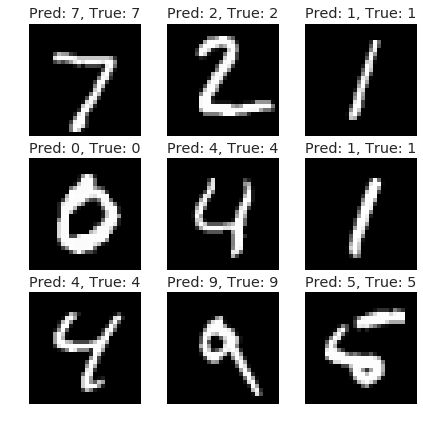

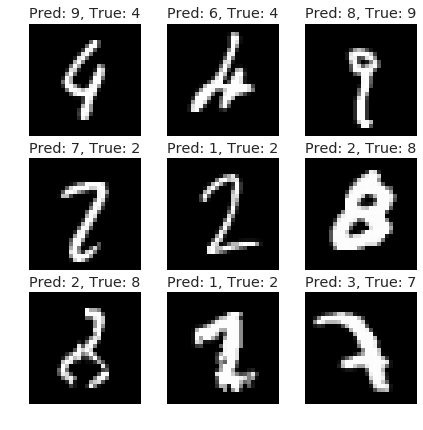

In [16]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred: {}, True: {}".format(predicted_classes[correct], y_test[correct]))
    plt.axis('off')
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred: {}, True: {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.axis('off')
    
plt.show()

In [23]:
from IPython.display import HTML
import cv2
import numpy as np

def classify(img):
    img = img[len('data:image/png;base64,'):].decode('base64')
    img = cv2.imdecode(np.fromstring(img, np.uint8), -1)
    img = cv2.resize(img[3,:,:], (28,28))
    img = img.astype(np.float32).reshape((1,1,28,28))/255.0
    return model.predict(img)[0]


HTML(filename="keras/mnist_demo.html")

## Convolution
The results that we got from the previous model seems good (Test accuracy: 0.9842), but when we look at the examples that were misclassified, we can see that the mistakes are pretty bad. It is easy for us to see the right class.

This what leads us to use more advance symbols and the first one is the Convolution (Conv2D below)

In [19]:
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras import backend as K

In [20]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th' :
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [21]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [23]:
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Compile model.

We just need to compile the model and we'll be ready to train it. When we compile the model, we declare the loss function and the optimizer (SGD, Adam, etc.).

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Fit model on training data.

To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.

In [25]:
model.fit(x_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 30s 500us/step - loss: 0.1962 - acc: 0.9396
Epoch 2/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0832 - acc: 0.9749
Epoch 3/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.0630 - acc: 0.9799
Epoch 4/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.0530 - acc: 0.9833
Epoch 5/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0468 - acc: 0.9859
Epoch 6/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0410 - acc: 0.9869
Epoch 7/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.0360 - acc: 0.9889
Epoch 8/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.0335 - acc: 0.9894
Epoch 9/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.0300 - acc: 0.9902
Epoch 10/10
60000/60000 [==============================] - 15s 247us/step - loss: 

In [26]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0249914188285
Test accuracy: 0.9925


In [27]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

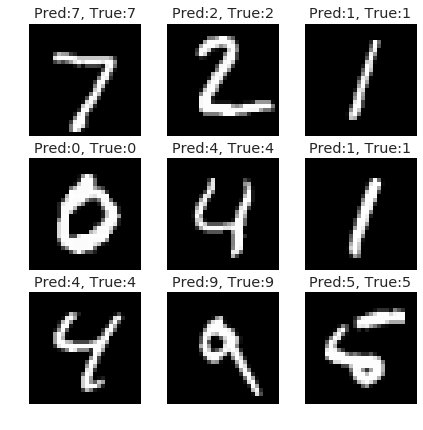

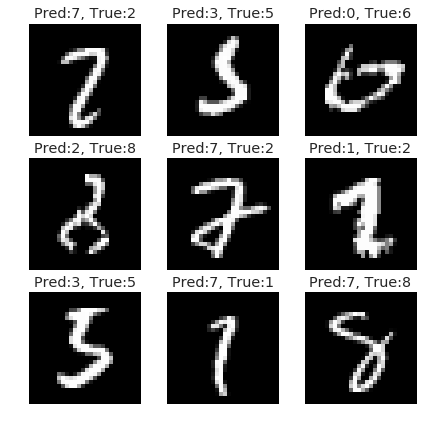

In [30]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred:{}, True:{}".format(predicted_classes[correct], y_test[correct]))
    plt.axis('off')
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred:{}, True:{}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.axis('off')
    
plt.show()